## Part1: Exploratory Data Analysis(EDA)

In [ ]:
# the object of this notebook is to give an idea how is the workflow in any predictive modeling problem.
# 

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [104]:
dirr = 'C:/Users/rsh15/Desktop/seunghuni/dataset/titanic'
df_train = pd.read_csv(dirr+'/train.csv')
df_test  = pd.read_csv(dirr+'/test.csv')

In [105]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### how many survived?

Text(0.5, 1.0, 'Survived')

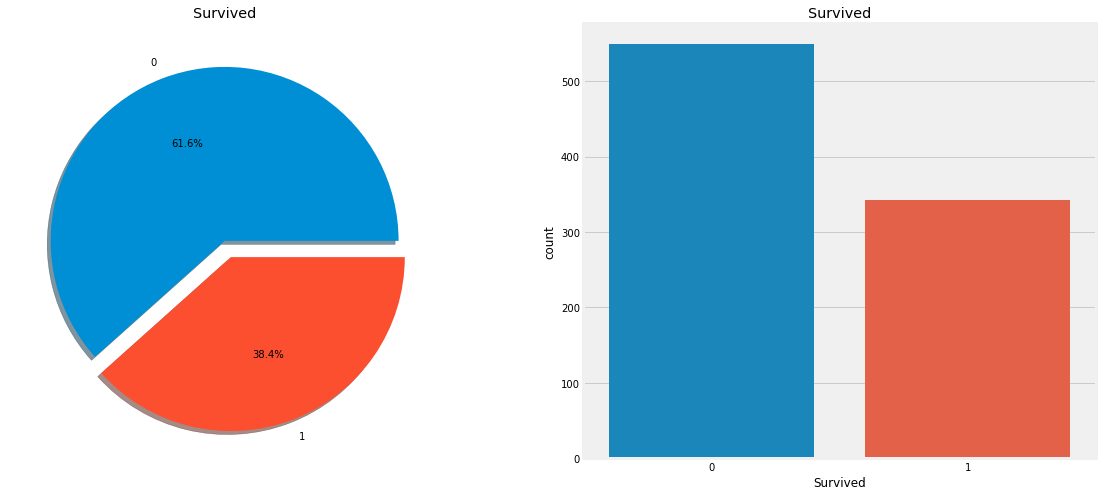

In [107]:
f,ax = plt.subplots(1,2,figsize=(18,8))
df_train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',data=df_train,ax=ax[1])
ax[1].set_title('Survived')

### Type of Features

In [1]:
# categorical features : Sex,Embarked
# A categorical variable is one that has two or more categories and each value in that feature can be categorised by them.
# For example. gender is a categorical variable having two categories(male and female).
# Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

In [2]:
# ordinal features : Pclass
# An ordinal variable is similar to categorical variables, but the difference between them is that we can have relative
# ordering or sorting between the values. For eg: if we have a feature like Height with values Tall, Medium, Short,
# then Height is a ordinal variable. Here we can have a relative sort in the variable.

In [3]:
# continuous features : Age
# A feature is said to be continuous if it can take values between any two points or between the minumum or maximum values
# in the features column.

### Analysing The Features

#### sex -> categorical feature

In [109]:
df_train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Sex:Survived vs Dead')

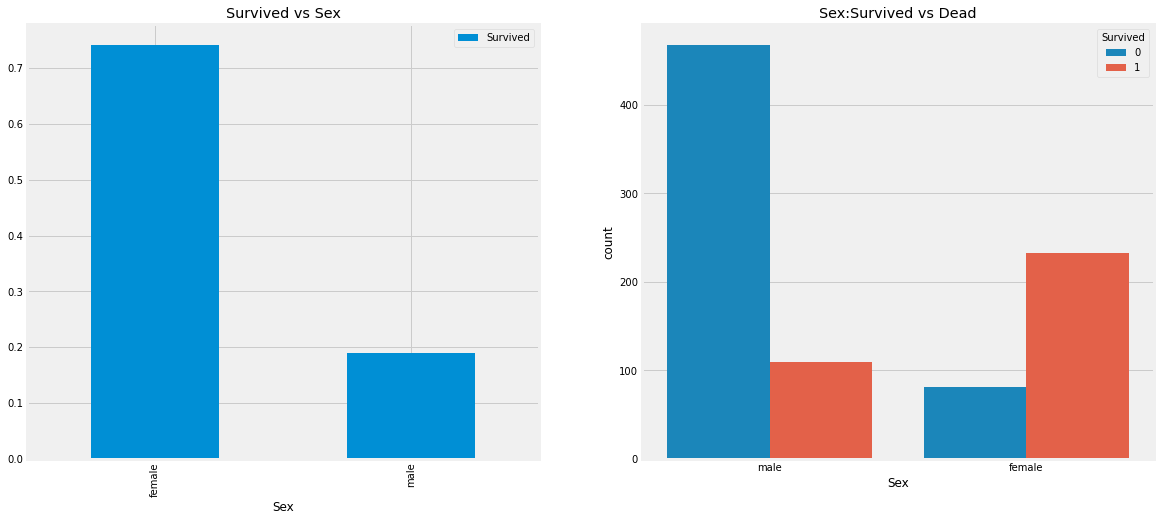

In [110]:
f,ax = plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')

In [ ]:
# the number of men on the ship is lot more than the number of women saved is almost twice the number of males saved.
# the survival rates for women on the ship is around 75% while that for men is around 18-19%

#### pclass -> ordinal features

In [111]:
pd.crosstab(df_train.Pclass,df_train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'Pclass:Survived vs Dead')

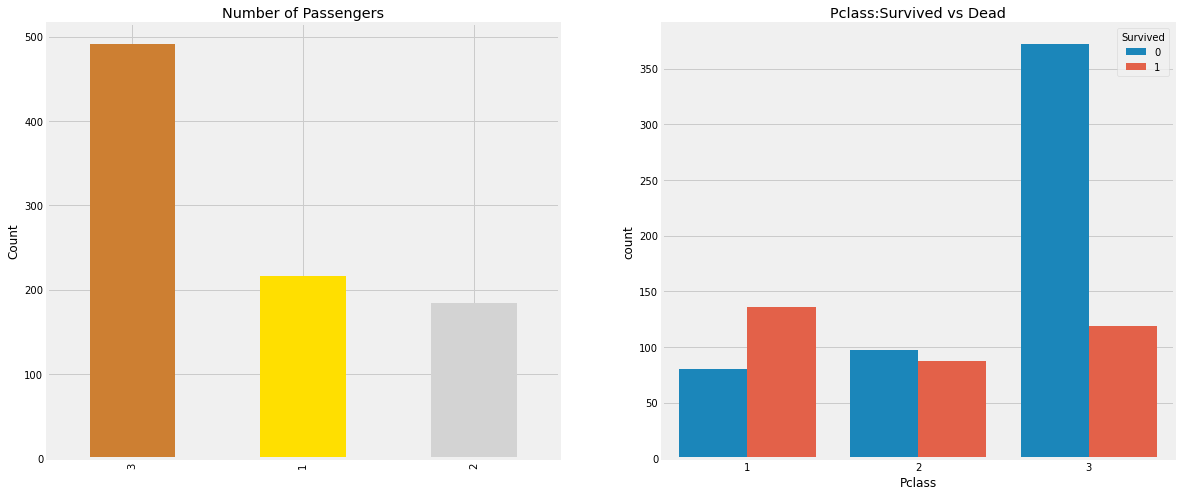

In [112]:
f,ax = plt.subplots(1,2,figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number of Passengers')
ax[0].set_ylabel('Count')

sns.countplot('Pclass',hue='Survived',data=df_train,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')

In [4]:
# Passengers of pclass 1 were given a very high priority while rescue
# even though the number of passengers in pclass 3 were alot higher, still number of survival from them is very low, 25%
#
# for pclass 1, 63% survived. pclass 2, 48% survived.

In [113]:
pd.crosstab([df_train.Sex,df_train.Survived],df_train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

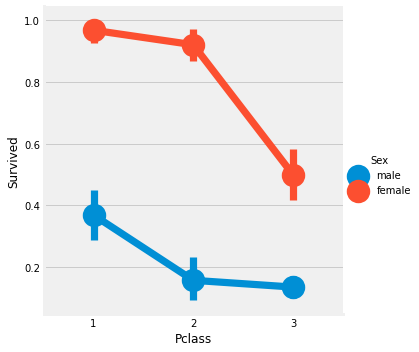

In [114]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train)

In [5]:
# Factorplot can make seperation of categorical values easily
# With crosstab and factorplot, we can see women from pclass 1 survived 95-96%, 3 out of 94 Women from Pclass1. 

#### age -> continuous plot

In [115]:
print('oldest passenger was of:',df_train['Age'].max(),'Years')
print('youngest passenger was of:',df_train['Age'].min(),'Years')
print('average age on the ship:',df_train['Age'].mean(),'Years')

oldest passenger was of: 80.0 Years
youngest passenger was of: 0.42 Years
average age on the ship: 29.69911764705882 Years


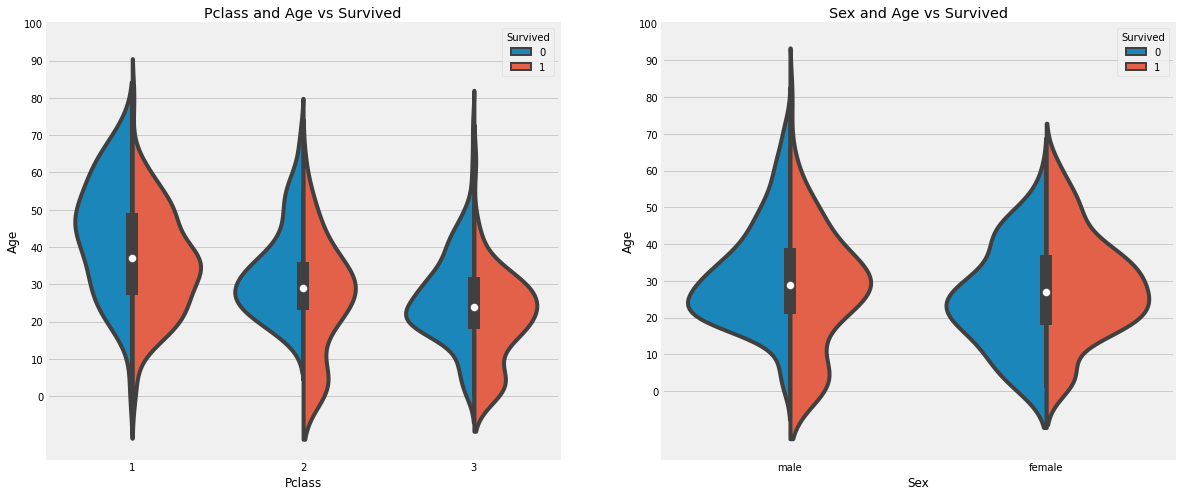

In [116]:
f,ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot('Pclass','Age',hue='Survived',data=df_train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex','Age',hue='Survived',data=df_train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

In [ ]:
# observations
# 1. the number of children increases with pclass and the survival rate for passengers below age 10 looks to be good 
#    irrespective of the pclass
# 2. survival chances for passengers aged 20-50 from pclass1 is high and is even better for women
# 3. for males, the survival chances decreases with an increases in age

In [117]:
df_train['Initial'] = 0
for i in df_train:
    df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.')

In [118]:
pd.crosstab(df_train['Initial'],df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [119]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [120]:
df_train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [6]:
# fill NaN Ages

In [121]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'),'Age'] = 33
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mrs'),'Age'] = 36
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Master'),'Age'] = 5
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Miss'),'Age'] = 22
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Other'),'Age'] = 46

In [122]:
df_train['Age'].isnull().any()

False

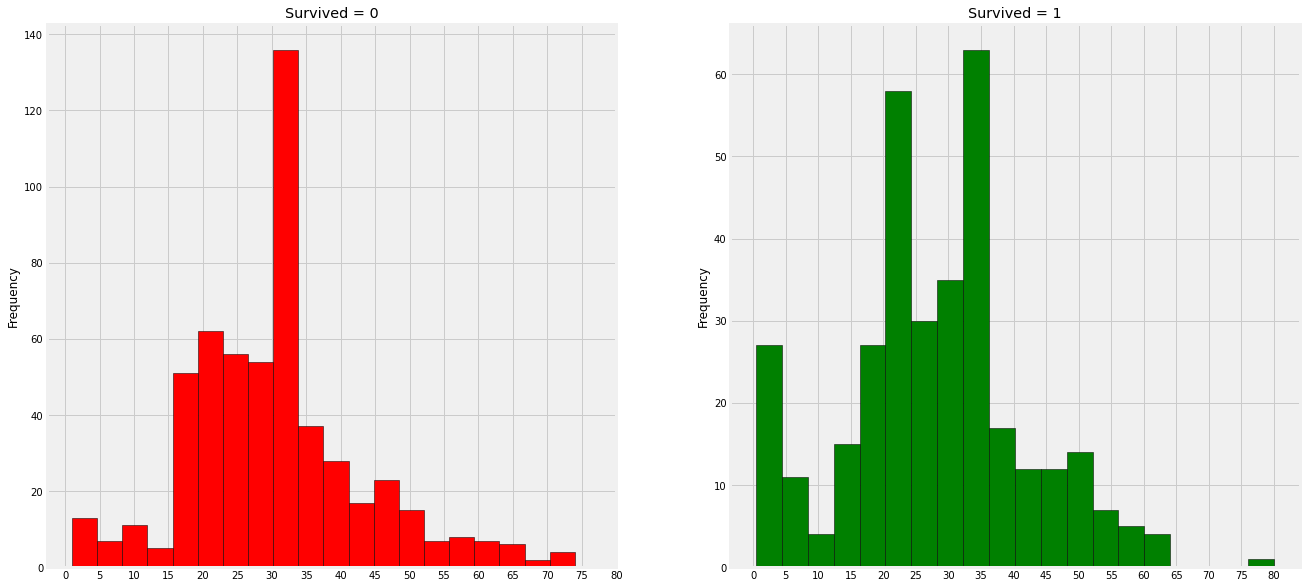

In [123]:
f,ax = plt.subplots(1,2,figsize=(20,10))
df_train[df_train['Survived'] == 0]['Age'].plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

df_train[df_train['Survived'] == 1]['Age'].plot.hist(ax=ax[1],bins=20,edgecolor='black',color='green')
ax[1].set_title('Survived = 1')
ax[1].set_xticks(x1)

In [7]:
# observations
# 1. the toddlers were saved in large numbers
# 2. the oldest passenger was saved(80 years).
# 3. maximum number of deaths were in the age group 30-40

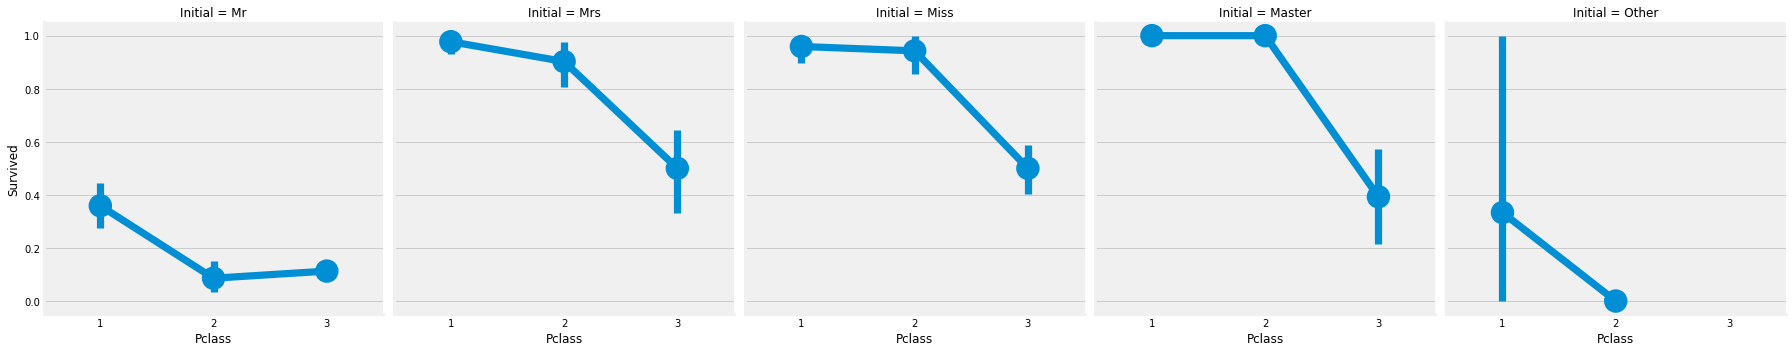

In [124]:
sns.factorplot('Pclass','Survived',col='Initial',data=df_train)

#### embarked -> categorical value

In [125]:
pd.crosstab([df_train.Embarked,df_train.Pclass],[df_train.Sex,df_train.Survived],margins=True).style.background_gradient(cmap='summer_r')

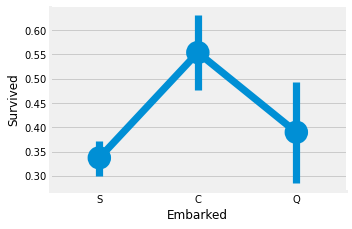

In [126]:
sns.factorplot('Embarked','Survived',data=df_train)
fig=plt.gcf()
fig.set_size_inches(5,3)

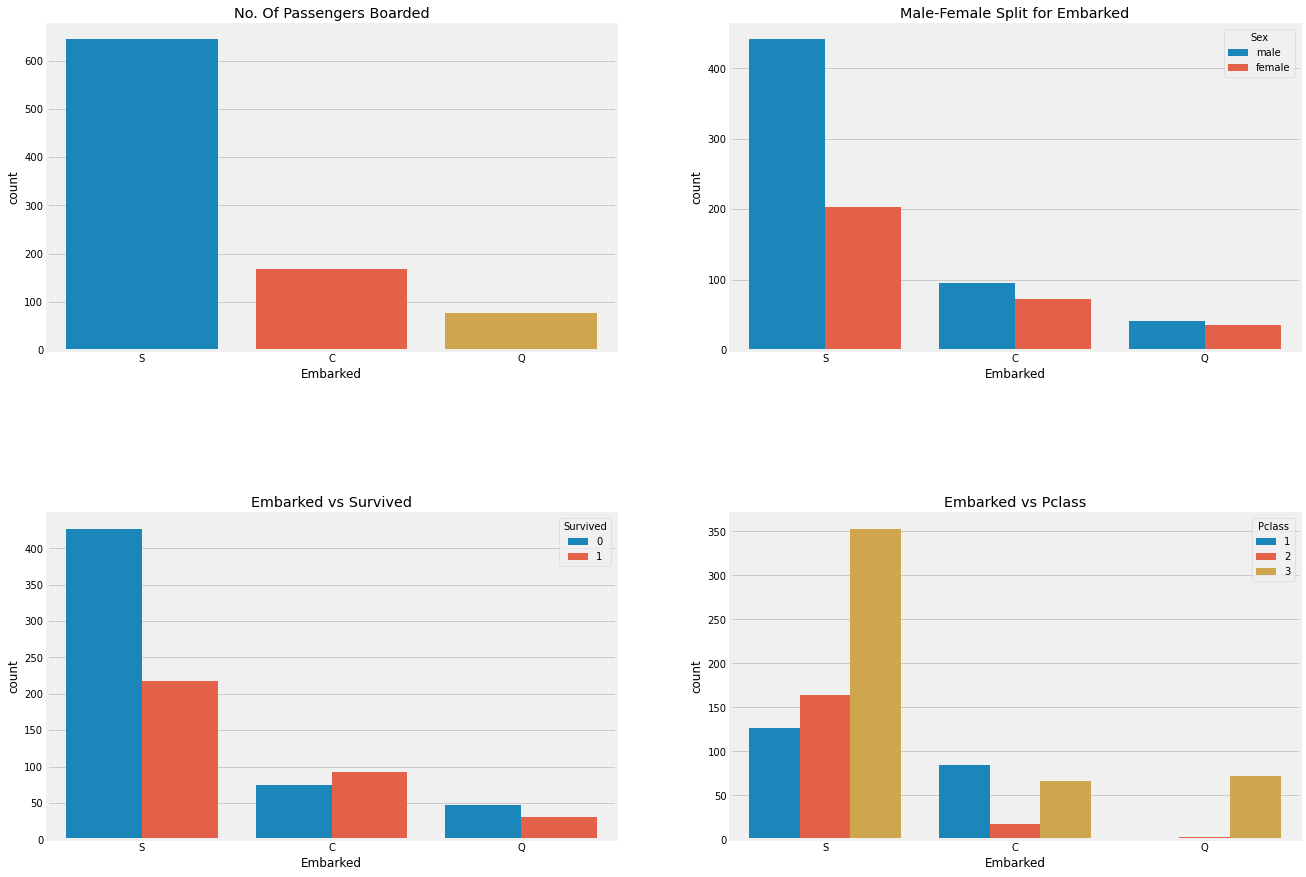

In [127]:
f,ax = plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df_train,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked',hue='Sex',data=df_train,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked',hue='Survived',data=df_train,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked',hue='Pclass',data=df_train,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)

In [ ]:
# observations
# 1. maximum passengers boarded from s.majority of them being from pclass 3.
# 2. the passengers from c look to be lucky as a good proportion of them survived.
#    the reason fro this may be the rescue of all the pclass1 and pclass2 passengers.
# 3. the embark s looks to the port from where majority of the rich people boarded. still the chances for survival is low
#    here, that is because many passengers from pclass3 around 81% didnt survive

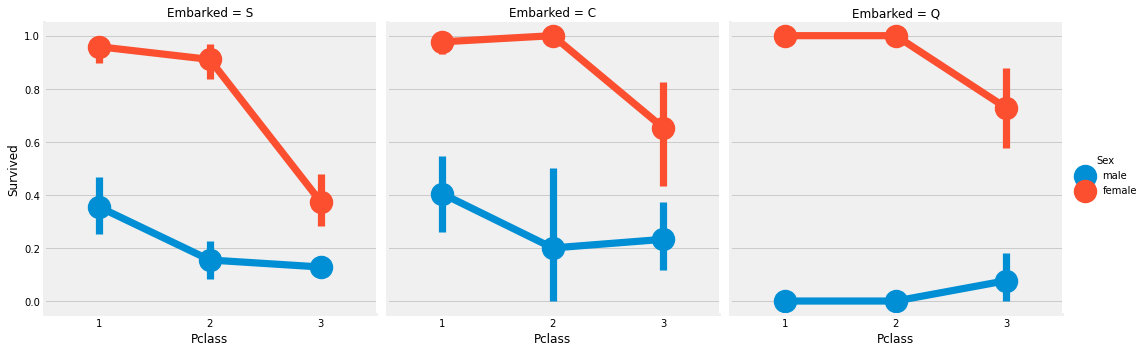

In [128]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=df_train)

In [8]:
# obervations
# 1. the survival chances are almost 1 for women for pclass1 and pclass2 irrespective of the pclass
# 2. port s looks to be very unlucky for pclass3 passengers as the survival rate for both men and women is very low.
# 3. port q looks to be unlukiest for men, as almost all were from pclass 3.

In [129]:
df_train['Embarked'].fillna('S',inplace=True)

In [130]:
df_train['Embarked'].isnull().any()

False

#### sibsp -> discrete feature

In [131]:
# sibling = brother, sister, stepbrother, stepsister
# spouse = husband, wife

In [132]:
pd.crosstab([df_train['SibSp']],df_train['Survived']).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


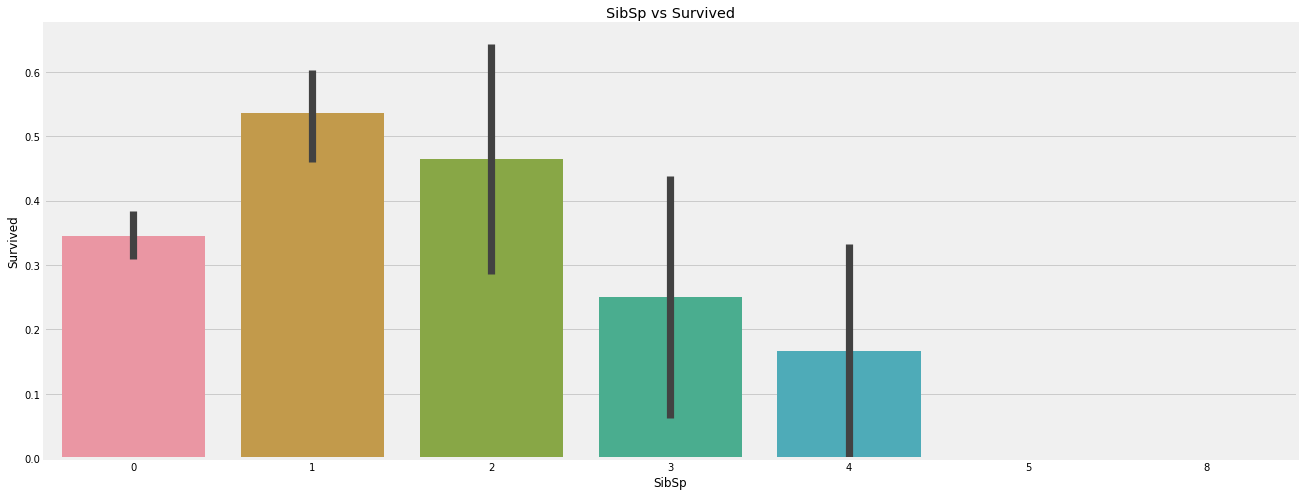

<Figure size 1440x576 with 0 Axes>

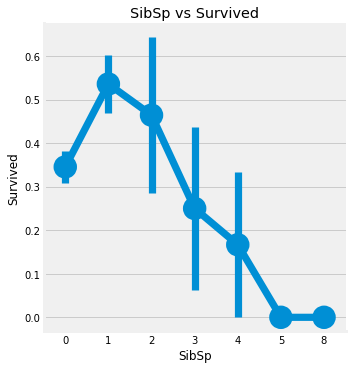

In [133]:
plt.figure(figsize=(20,8))
sns.barplot('SibSp','Survived',data=df_train)
plt.title('SibSp vs Survived')

plt.figure(figsize=(20,8))
sns.factorplot('SibSp','Survived',data=df_train)
plt.title('SibSp vs Survived')
plt.show()

In [134]:
pd.crosstab(df_train['SibSp'],df_train['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


In [ ]:
# barplot and factorplot shows that if a passenger is  alone onboard with no siblings, he have 34.5% survival rate.
# the graph roughly decreases if the number of siblings increase.
# that is, if i have family on board, i will try to save them instead of saving myself first.
# surprisingly the survival for families with 5-8 members is 0%. the reason may be pclass?

In [135]:
pd.crosstab(df_train['Parch'],df_train['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


Text(0.5, 1.0, 'Parch vs Survived')

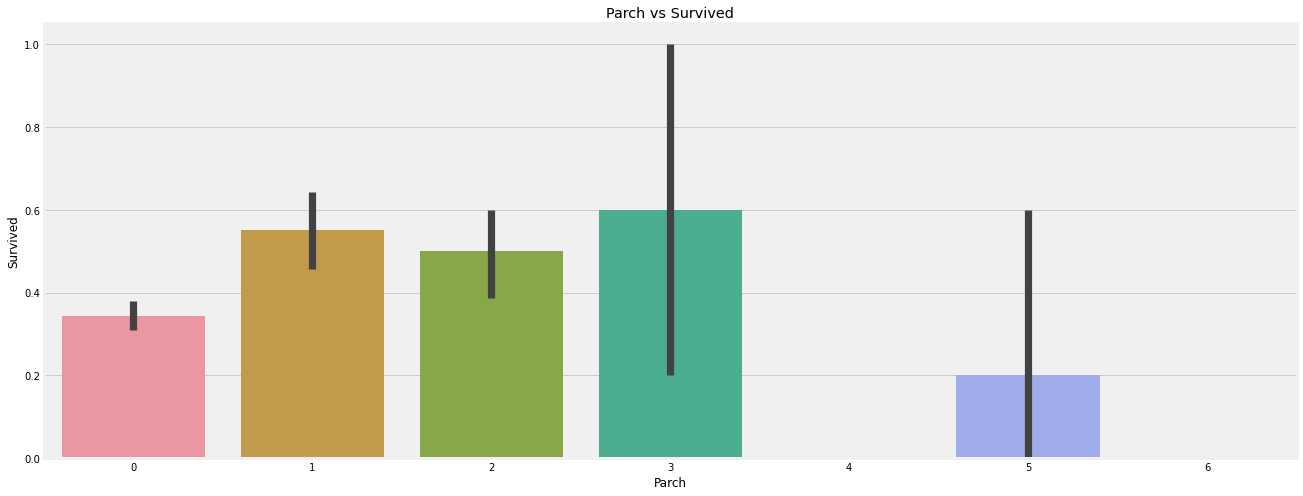

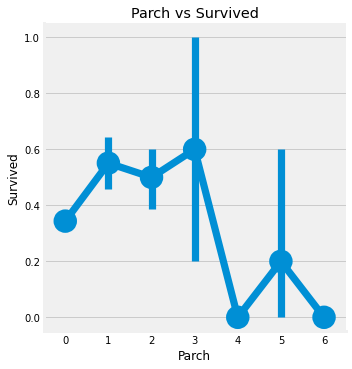

In [136]:
plt.figure(figsize=(20,8))
sns.barplot('Parch','Survived',data=df_train)
plt.title('Parch vs Survived')

sns.factorplot('Parch','Survived',data=df_train)
plt.title('Parch vs Survived')

#### fare -> continous feature

In [137]:
print('Highest Fare was:',df_train['Fare'].max())
print('Lowest Fare was:',df_train['Fare'].min())
print('Average Fare was:',df_train['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


Text(0.5, 1.0, 'Fare in Plcass 3')

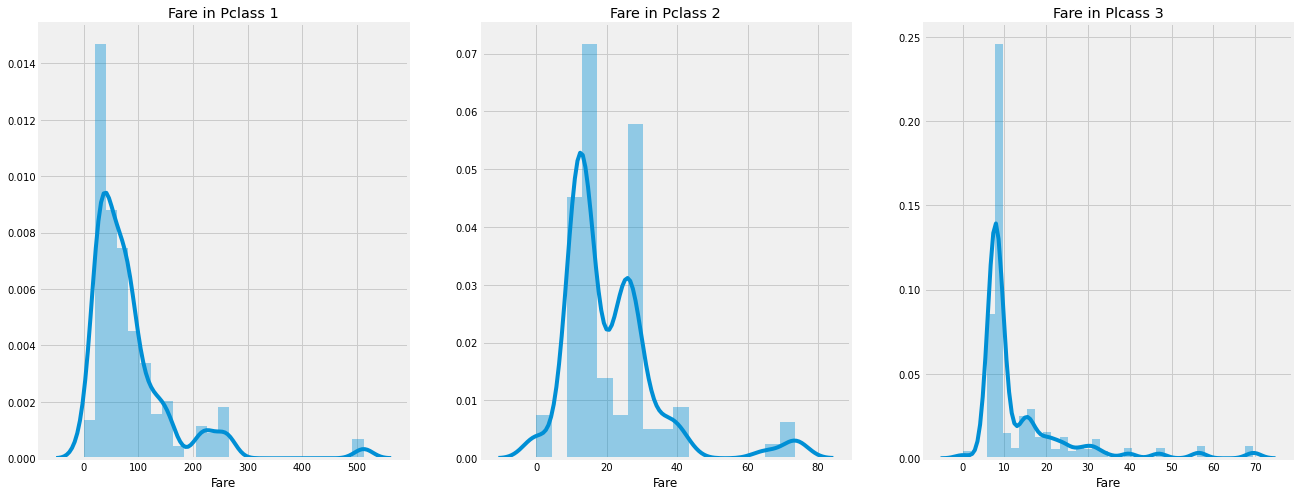

In [138]:
f,ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(df_train[df_train['Pclass'] == 1]['Fare'],ax=ax[0])
ax[0].set_title('Fare in Pclass 1')

sns.distplot(df_train[df_train['Pclass'] == 2]['Fare'],ax=ax[1])
ax[1].set_title('Fare in Pclass 2')

sns.distplot(df_train[df_train['Pclass'] == 3]['Fare'],ax=ax[2])
ax[2].set_title('Fare in Plcass 3')

In [9]:
# observations in a nutshell for features.
# sex : the chance of survival for women is high as compared to men
# pclass : there is a visible trend that being a 1st class passenger gives you better chance of survival.
#          survival rate for pclass3 is very low.for women, the chance of survival pclass is almost 1 and is high too for
#          those from pclass2. money wins!
# age : children less than 5-10 years do have a high chance of survival. passengers between age group 15 to 35 died a lot.

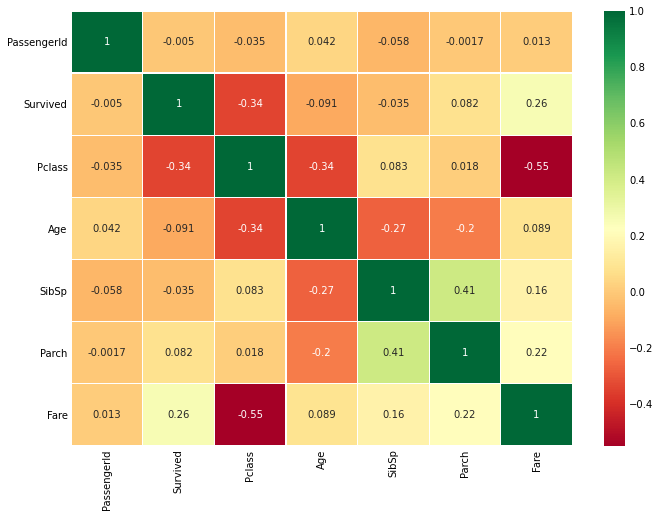

In [139]:
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)

### feature engineering and data cleaning

#### age_band

In [ ]:
# age is a continuous feature, there is a problem with continuous variables in machine learning
# eg: i say to group or arrange sports person by sex. we can easily segregate them by male and female
# now if i say group by age, how would you do it? if there are 30 persons, there may be 30 age values.
# we need to convert these continuous values into categorical values by either binning or normalization.
# i will be using binning i.e group a range of ages into a single bin or assign them a single value.

In [140]:
df_train['Age_band'] = 0
df_train.loc[df_train['Age'] <= 16,'Age_band'] = 0
df_train.loc[(df_train['Age'] > 16) & (df_train['Age'] <= 32),'Age_band'] = 1
df_train.loc[(df_train['Age'] > 32) & (df_train['Age'] <= 48),'Age_band'] = 2
df_train.loc[(df_train['Age'] > 48) & (df_train['Age'] <= 64),'Age_band'] = 3
df_train.loc[df_train['Age'] > 64,'Age_band'] = 4
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [141]:
df_train['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


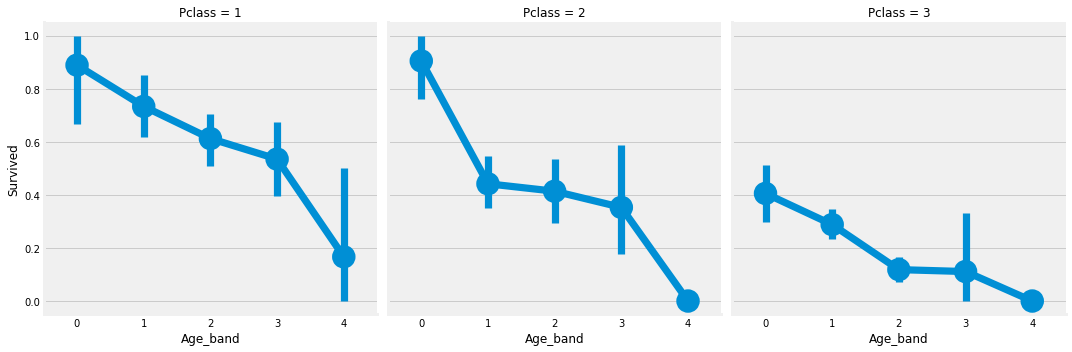

In [142]:
sns.factorplot('Age_band','Survived',data=df_train,col='Pclass')

#### Family_Size and Alone

In [ ]:
# we can create new feature called 'family_size' and 'alone' and analyse it.
# this feature is the summation of parch and sibsp. it gives us combined data so that we can check if survival rate have
# anything to do with family size of passengers. alone will denote whether a passenger is alone or not.

In [143]:
df_train['Family_size'] = 0
df_train['Family_size'] = df_train['Parch'] + df_train['SibSp']

df_train['Alone'] = 0
df_train.loc[df_train['Family_size'] == 0,'Alone'] = 1

Text(0.5, 1.0, 'Alone vs Survived')

<Figure size 1296x432 with 0 Axes>

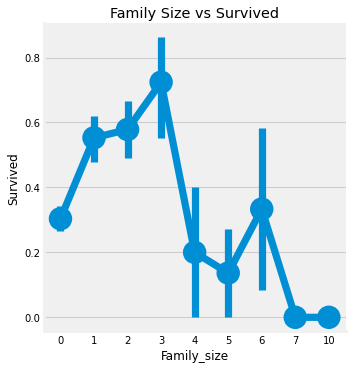

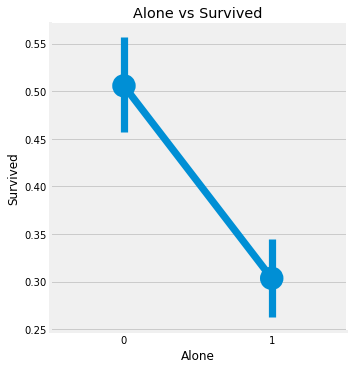

In [144]:
plt.figure(figsize=(18,6))
sns.factorplot('Family_size','Survived',data=df_train,ax=ax[0])
plt.title('Family Size vs Survived')

sns.factorplot('Alone','Survived',data=df_train,ax=ax[1])
plt.title('Alone vs Survived')

In [ ]:
# familysize=0 means that the passenger is alone. if you are alone or family_size=0, then chances for survival is very low.
# for family size>4, the chances decrease too. this also looks to be an important feature for the model.
# lets examine this further.

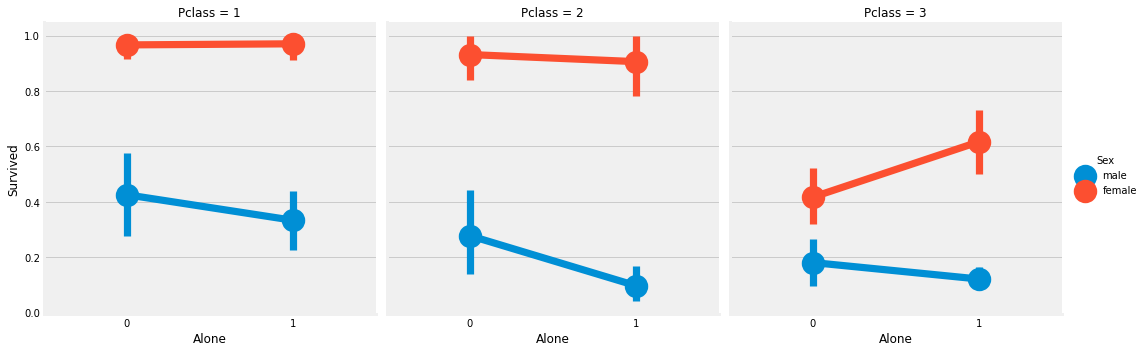

In [145]:
sns.factorplot('Alone','Survived',data=df_train,hue='Sex',col='Pclass')

#### Fare Range

In [ ]:
# since fare is also continuous feature, we need to convert it into ordinal value. for this we will use pandas.qcut
# so what qcut does is it splits or arranges the values according the number of bins we have passed.
# so if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.

In [146]:
# fare range increases, the chances of survival increases
df_train['Fare_range'] = pd.qcut(df_train['Fare'],4)
df_train.groupby('Fare_range')['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [147]:
df_train['Fare_cat']=0
df_train.loc[df_train['Fare']<=7.91,'Fare_cat']=0
df_train.loc[(df_train['Fare']>7.91)&(df_train['Fare']<=14.454),'Fare_cat']=1
df_train.loc[(df_train['Fare']>14.454)&(df_train['Fare']<=31),'Fare_cat']=2
df_train.loc[(df_train['Fare']>31)&(df_train['Fare']<=513),'Fare_cat']=3

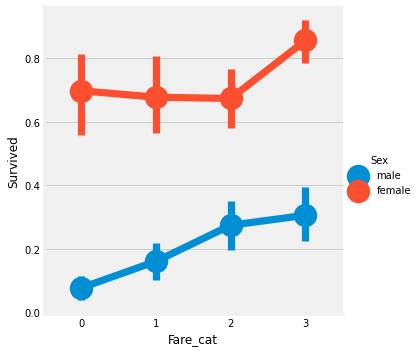

In [148]:
sns.factorplot('Fare_cat','Survived',data=df_train,hue='Sex')

#### convert string values into numeric

In [10]:
# since we cannot pass strings to a machine learning model, we need to convert features like sex,embarked,etc into numeric

In [149]:
df_train['Sex'].replace(['male','female'],[0,1],inplace=True)
df_train['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df_train['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [11]:
# dropping unneeded features.
# name, age, ticket, fare, cabin, fare_range, passengerid

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0, 0.5, 'Survived'),
  Text(0, 1.5, 'Pclass'),
  Text(0, 2.5, 'Sex'),
  Text(0, 3.5, 'SibSp'),
  Text(0, 4.5, 'Parch'),
  Text(0, 5.5, 'Embarked'),
  Text(0, 6.5, 'Initial'),
  Text(0, 7.5, 'Age_band'),
  Text(0, 8.5, 'Family_size'),
  Text(0, 9.5, 'Alone'),
  Text(0, 10.5, 'Fare_cat')])

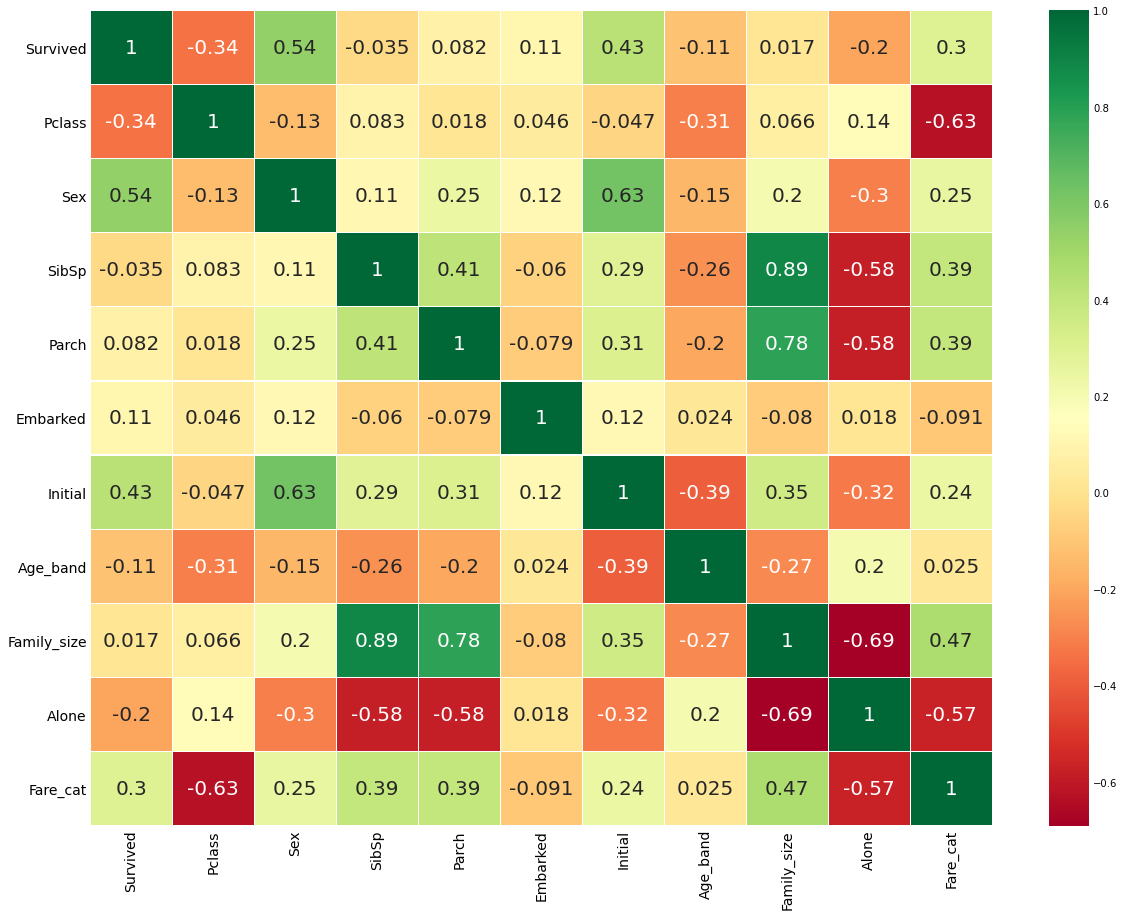

In [150]:
df_train.drop(['Name','Age','Ticket','Fare','Cabin','Fare_range','PassengerId'],axis=1,inplace=True)
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [185]:
train,test = train_test_split(df_train,test_size=0.3,random_state=0,stratify=df_train['Survived'])
train_x = df_train[df_train.columns[1:]]
train_y = df_train[df_train.columns[:1]]
test_x  = df_train[df_train.columns[1:]]
test_y  = df_train[df_train.columns[:1]]
x = df_train[df_train.columns[1:]]
y = df_train['Survived']

In [158]:
# support vector machine  - rbf
model = svm.SVC(kernel='rbf', C=1,gamma=0.1)
model.fit(train_x,train_y)
prediction1 = model.predict(test_x)
print('accuracy for rbf svm is',metrics.accuracy_score(prediction1,test_y))

accuracy for rbf svm is 0.8316498316498316


In [159]:
# support vector machine - linear
model = svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_x,train_y)
prediction2 = model.predict(test_x)
print('accuracy for linear svm is',metrics.accuracy_score(prediction2,test_y))

accuracy for linear svm is 0.8092031425364759


In [164]:
# logistic regession
model = LogisticRegression()
model.fit(train_x,train_y)
prediction3 = model.predict(test_x)
print('accuracy for logistic regression is',metrics.accuracy_score(prediction3,test_y))

accuracy for logistic regression is 0.8125701459034792


In [160]:
# decision tree
model = DecisionTreeClassifier()
model.fit(train_x,train_y)
prediction4 = model.predict(test_x)
print('accuracy for decision tree is',metrics.accuracy_score(prediction4,test_y))

accuracy for decision tree is 0.8922558922558923


In [166]:
# knn
model = KNeighborsClassifier()
model.fit(train_x,train_y)
prediction5 = model.predict(test_x)
print('accuracy for knn is',metrics.accuracy_score(prediction5,test_y))

accuracy for knn is 0.8383838383838383


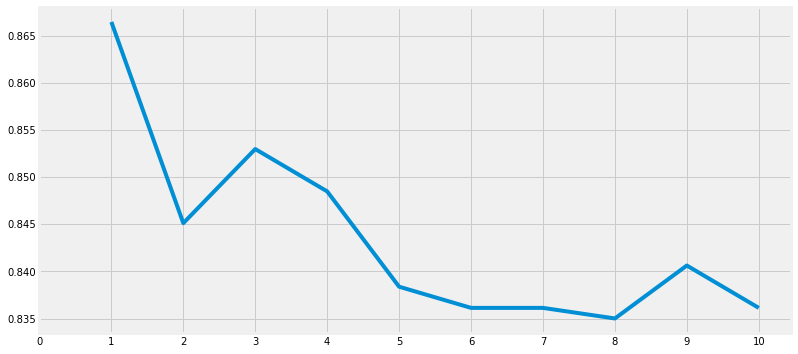

In [167]:
a_index = list(range(1,11))
a = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_x,train_y)
    prediction = model.predict(test_x)
    a = a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))

plt.plot(a_index,a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12,6)

In [175]:
# gaussian naive bayes
model  = GaussianNB()
model.fit(train_x,train_y)
prediction6 = model.predict(test_x)
print('accuracy for naive bayes is',metrics.accuracy_score(prediction6,test_y))

accuracy for naive bayes is 0.8058361391694725


In [180]:
# random forests
model = RandomForestClassifier(n_estimators = 100)
model.fit(train_x,train_y)
prediction7 = model.predict(test_x)
print('accuracy for random forest is',metrics.accuracy_score(prediction7,test_y))

accuracy for random forest is 0.8922558922558923


In [181]:
# the accuracy of model is not the only factor that determines the robustness of the classifier.
# let's say that a classifier is trained over training data and tested over the test data and it scores an accuracy of 90%

### cross validation

In [182]:
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict

In [183]:
kfold = KFold(n_splits=10,random_state=22)
xyz = []
accuracy = []
std = []
classifiers = ['Linear SVM','Radial SVM','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models = [svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),
          DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]

In [191]:
for i in models:
    model = i
    cv_result = cross_val_score(model,x,y,cv=kfold,scoring='accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe = pd.DataFrame({'cv mean':xyz,'std':std},index=classifiers)
new_models_dataframe

,cv mean,std
Linear SVM,0.793471,0.047797
Radial SVM,0.828290,0.034427
Logistic Regression,0.805843,0.024061
KNN,0.813783,0.041210
Decision Tree,0.805893,0.032923
Naive Bayes,0.801386,0.028999
Random Forest,0.815993,0.033008


<AxesSubplot:>

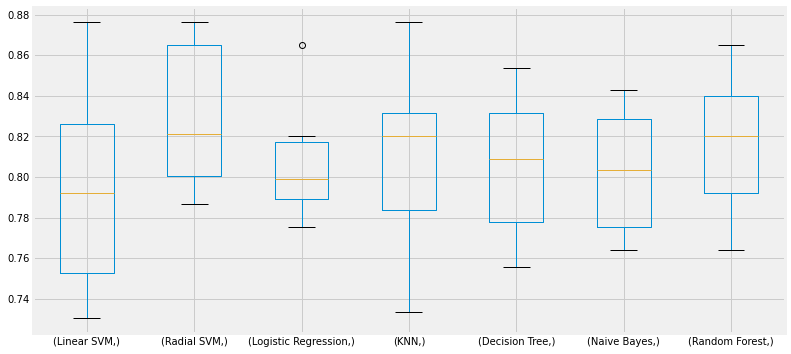

In [193]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

<AxesSubplot:>

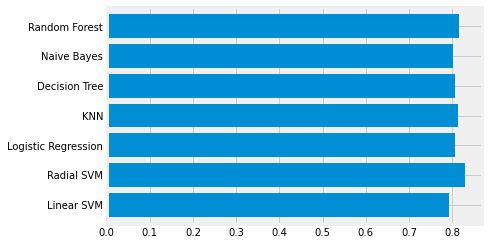

In [198]:
new_models_dataframe['cv mean'].plot.barh(width=0.8)

In [199]:
# the classification accuracy can be somtimes misleading due to imbalance.
# we can get a summarized result with the help of confusion matrix, which shows where did the model go wrong,
# or which class did the model predict wrong

### confusion matrix

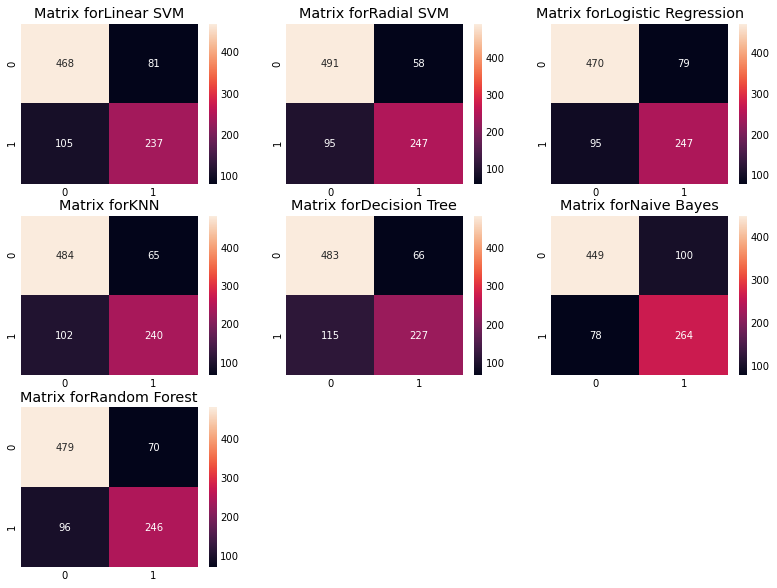

In [214]:
plt.figure(figsize=(12,10))
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1)
    y_pred = cross_val_predict(models[i],x,y,cv=10)
    sns.heatmap(confusion_matrix(y,y_pred),annot=True,fmt='2.0f')
    title_txt = 'Matrix for' + classifiers[i]
    plt.title(title_txt)

### ensembling

#### voting classifier

In [215]:
models

[SVC(kernel='linear'),
 SVC(),
 LogisticRegression(),
 KNeighborsClassifier(n_neighbors=9),
 DecisionTreeClassifier(),
 GaussianNB(),
 RandomForestClassifier()]

In [216]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))],
                                  voting='soft').fit(train_x,train_y)

print('accuracy for ensembled model is:',ensemble_lin_rbf.score(test_x,test_y))
cross = cross_val_score(ensemble_lin_rbf,x,y,cv=10,scoring='accuracy')
print('The cross validated score is',cross.mean())

accuracy for ensembled model is: 0.8473625140291807
The cross validated score is 0.8249188514357053


#### bagging

In [218]:
# bagged knn
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(base_estimator  = KNeighborsClassifier(n_neighbors=3),random_state=0,
                          n_estimators = 700)
model.fit(x,y)
prediction = model.predict(test_x)
print('the accuracy for bagged knn is:',metrics.accuracy_score(prediction,test_y))
result = cross_val_score(model,x,y,cv=10,scoring='accuracy')
print('the cross validated score for bagged knn is:',result.mean())

the accuracy for bagged knn is: 0.867564534231201
the cross validated score for bagged knn is: 0.8160424469413232


In [219]:
# bagged decision tree
model = BaggingClassifier(base_estimator = DecisionTreeClassifier(),random_state=0,
                          n_estimators = 100)
model.fit(train_x,train_y)
prediction = model.predict(test_x)
print('the accuracy for bagged decision tree is:',metrics.accuracy_score(prediction,test_y))
result = cross_val_score(model,x,y,cv=10,scoring='accuracy')
print('the cross  validated score for bagged decision tree is:',result.mean())

the accuracy for bagged decision tree is: 0.8922558922558923
the cross  validated score for bagged decision tree is: 0.8171410736579275


#### boosting

In [223]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result = cross_val_score(ada,x,y,cv=10,scoring='accuracy')
print('the cross validated score for adaboost is:',result.mean())

the cross validated score for adaboost is: 0.8249188514357055


In [224]:
from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result = cross_val_score(grad,x,y,cv=10,scoring='accuracy')
print('the cross validated score for gradient boosting is:',result.mean())

the cross validated score for gradient boosting is: 0.8115230961298376


In [226]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(n_estimators=900,learning_rate=0.1)
result = cross_val_score(xgboost,x,y,cv=10,scoring='accuracy')
print('the cross validated score for xgboost is:',result.mean())

the cross validated score for xgboost is: 0.8160299625468165


#### hyper parameter tuning for adaboost

In [230]:
from sklearn.model_selection import GridSearchCV
n_estimators = list(range(100,1100,100))
learn_rate = [0.05,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper = {'n_estimators':n_estimators,
         'learning_rate':learn_rate}
gd = GridSearchCV(estimator = AdaBoostClassifier(),param_grid = hyper,verbose=True)
gd.fit(x,y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  8.6min finished


### confusion matrix for the best model

<AxesSubplot:>

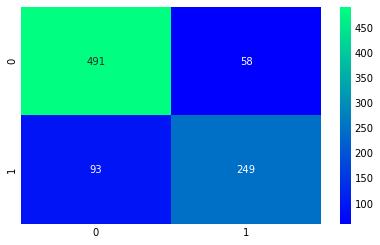

In [232]:
ada = AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result = cross_val_predict(ada,x,y,cv=10)
sns.heatmap(confusion_matrix(y,result),cmap='winter',annot=True,fmt='2.0f')

In [251]:
mds = [RandomForestClassifier(n_estimators=500,random_state=0),
       AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0),
       GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0),
       XGBClassifier(n_estimators=900,learning_rate=0.1)]
mds_txt = ['rf','ada','gbc','xgb']
mds_col = ['blue','yellow','green','red']

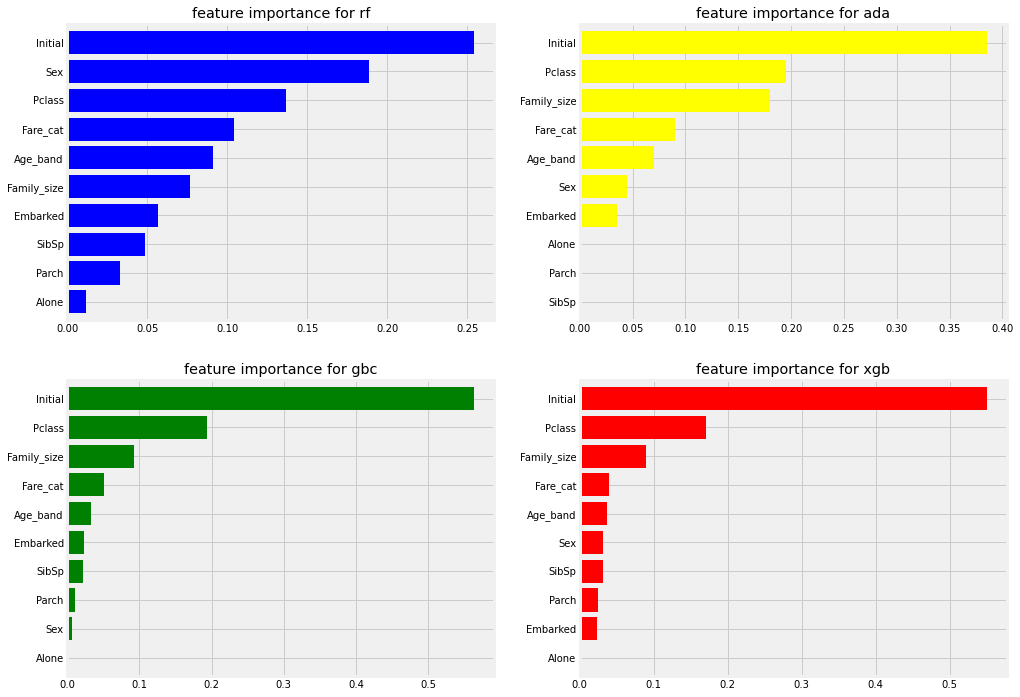

In [253]:
plt.figure(figsize=(15,12))
for k in range(len(mds)):
    plt.subplot(2,2,k+1)
    model = mds[k]
    model.fit(x,y)
    pd.Series(model.feature_importances_,x.columns).sort_values(ascending=True).plot.barh(width=0.8,color=mds_col[k])
    title_txt = 'feature importance for ' + mds_txt[k]
    plt.title(title_txt)